In [93]:
# Limpando dados de dataset de salários de cientistas de dados.
# Desejamos filtrar apaenas os salários em dolar de cientistas
# de dados e compará-los conforme o país em que residem. Além
# de comparar o salário conforme o tamanho da empresa

In [94]:
import pandas as pd
import seaborn as sns
import statistics as stc
import numpy as np
import matplotlib.pyplot as plt

In [95]:
# Dataset: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

In [96]:
df = pd.read_csv("ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [97]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [98]:
# Não há dados nulos

In [99]:
df.shape

(607, 12)

In [100]:
# Vamos excluir colunas não necessárias para o cliente

In [101]:
df.drop(["work_year", "experience_level", "employment_type", "salary", "salary_currency", "remote_ratio", "company_location"], axis=1, inplace=True)

In [102]:
df.head()

,Unnamed: 0,job_title,salary_in_usd,employee_residence,company_size
0,0,Data Scientist,79833,DE,L
1,1,Machine Learning Scientist,260000,JP,S
2,2,Big Data Engineer,109024,GB,M
3,3,Product Data Analyst,20000,HN,S
4,4,Machine Learning Engineer,150000,US,L


In [103]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [104]:
df


,job_title,salary_in_usd,employee_residence,company_size
0,Data Scientist,79833,DE,L
1,Machine Learning Scientist,260000,JP,S
2,Big Data Engineer,109024,GB,M
3,Product Data Analyst,20000,HN,S
4,Machine Learning Engineer,150000,US,L
...,...,...,...,...
602,Data Engineer,154000,US,M
603,Data Engineer,126000,US,M
604,Data Analyst,129000,US,M
605,Data Analyst,150000,US,M


In [105]:
df = df.loc[df["job_title"].isin(["Data Scientist"])]

In [106]:
df

,job_title,salary_in_usd,employee_residence,company_size
0,Data Scientist,79833,DE,L
7,Data Scientist,35735,HU,L
10,Data Scientist,51321,FR,S
11,Data Scientist,40481,IN,L
12,Data Scientist,39916,FR,M
...,...,...,...,...
592,Data Scientist,230000,US,M
593,Data Scientist,150000,US,M
596,Data Scientist,210000,US,M
598,Data Scientist,160000,US,M


In [107]:
# Agora possuímos somente os dados de cientistas de dados e seus salários em dolar

Text(0.5, 0, 'Valor(US$)')

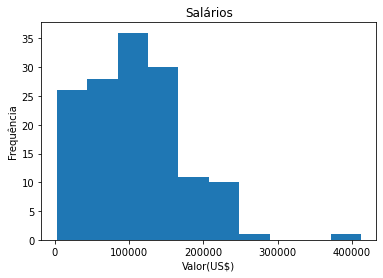

In [108]:
plt.hist(df.iloc[:,1],bins=10) 
plt.title("Salários") # Nome do histograma
plt.ylabel("Frequência") # Nome do eixo y
plt.xlabel("Valor(US$)") # Nome do eixo x

In [109]:
# Podemos constatar que a maioria dos salários está entre 00 e 150k, sendo que a moda é ~= 100k

# Agora por Local de Residência:
df.groupby(df["employee_residence"]).size()

employee_residence
AT     1
AU     1
BR     2
CA     6
CH     1
CL     1
DE     7
DZ     1
ES     3
FR     8
GB    11
GR     1
HU     1
IN     9
IT     1
JP     1
MX     1
NG     1
PH     1
PL     1
RS     1
RU     1
SG     1
TR     1
UA     1
US    78
VN     1
dtype: int64

In [110]:
# Vamos fazer análise pelos 3 com mais frequência: US, GB, IN.
df_US = df.loc[df["employee_residence"].isin(["US"])]
df_GB = df.loc[df["employee_residence"].isin(["GB"])]
df_IN = df.loc[df["employee_residence"].isin(["IN"])]

array([[<AxesSubplot:title={'center':'salary_in_usd'}>]], dtype=object)

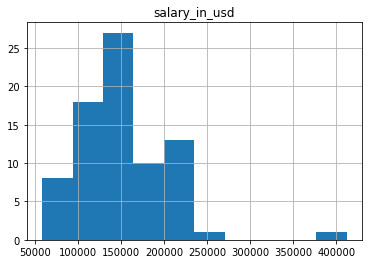

In [111]:
df_US.hist()

array([[<AxesSubplot:title={'center':'salary_in_usd'}>]], dtype=object)

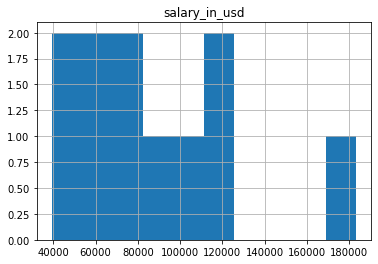

In [112]:
df_GB.hist()

array([[<AxesSubplot:title={'center':'salary_in_usd'}>]], dtype=object)

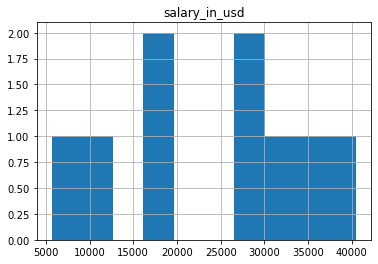

In [113]:
df_IN.hist()

In [114]:
# Agora vamos salvar as médias salariais destes 3 países em uma lista

lista_medias = [stc.mean(df_US["salary_in_usd"]), stc.mean(df_GB["salary_in_usd"]), stc.mean(df_IN["salary_in_usd"])]

In [115]:
lista_medias

[149408.33333333334, 88177.36363636363, 23838.333333333332]

In [116]:
lista_medias[0]/lista_medias[1]

1.6944068995925226

In [117]:
lista_medias[0]/lista_medias[2]

6.2675662448437395

In [121]:
# Conclusão 1: a média salarial no US de um Data Scientist é 6.26 maior que no IN, e 1.69 maior que na GB

# Agora vamos comparar conforme o tamanho: L, M or S:

df.groupby(df["company_size"]).size()

company_size
L    45
M    77
S    21
dtype: int64

C:\Users\Davi Principal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='employee_residence', ylabel='salary_in_usd'>

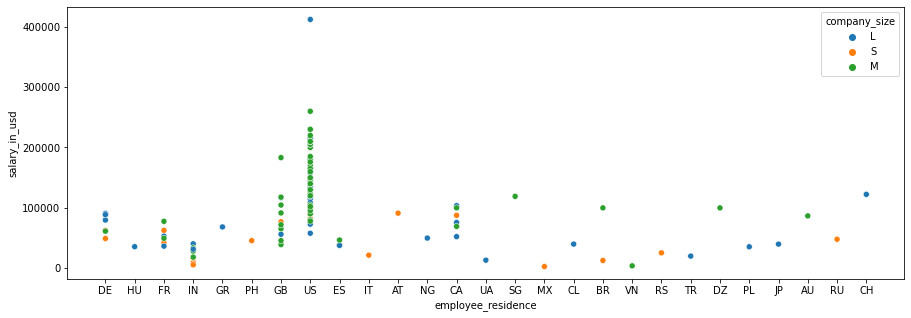

In [122]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.scatterplot(df["employee_residence"], df["salary_in_usd"], hue = df["company_size"])